In [9]:
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np
from shapely.geometry import Point
from matplotlib import pyplot as plt

import os

This notebook is an exercise in the data analysis method known as "split-apply-combine." The idea is that you <b>split</b> a big set of data into different groups, then you <b>apply</b> the same function or anlaysis to those datapoints, and then <b>combine</b> them together again to compare the groups to each other. 
<br>
<br>
In this activity we are <b>splitting</b> watersheds based on their attributes as related to permafrost hydrology. We will then <b>apply</b> some analysis to those watersheds (e.g. asking what sorts of spectral trends we see in time and space) and then <b>combine</b> them for a wholistic analysis

<B>SAVE A COPY OF THIS NOTEBOOK! I WILL UPDATE THIS NOTEBOOK AND YOU MIGHT LOSE YOUR WORK IF YOU DON"T SAVE YOUR OWN COPY!</b>

Go to File -> Make a copy and edit that notebook

# Gather necessary "splitting" data 

Here we want to make sure we're creating the best "splitting" dataset we can, which can involve merging more than one table from your dataset

## Turn .csv into a shapefile

In [10]:
# Load and clean data
df = pd.read_csv('data_tables/evans_hydro_supplement_new.csv', encoding='windows-1254')
df['Catchment area (km2)'] = df['Catchment area (km2)'].astype(float)
df.columns.values[-1] = "Prior primary permafrost type"
df = df.reindex(columns=df.columns)

In [11]:
df.head()

,Station ID#,Name,Basin,Catchment area (km2),Latitude,Longitude,Station elevation (m.a.s.l.),Start year,End year,Continuous permafrost (%),Discontinuous permafrost (%),Sporadic permafrost (%),Isolated permafrost (%),No permafrost (%),Primary permafrost type,Prior primary permafrost type
0,1001,Kolyma at Orotuk,Anadyr Kolyma,43776.0,62.12,148.47,478.2,1968,1996,100.0,0.0,0.0,0.0,0.0,Continuous,NaN
1,1095,Kulu at Kulu,Anadyr Kolyma,10289.0,61.90,147.42,617.1,1942,1994,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous
2,1151,Detrin at Detrin,Anadyr Kolyma,3237.0,61.13,149.67,556.5,1956,2001,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous
3,1176,Bokhalcha at 5.4 km from ust'ya,Anadyr Kolyma,13551.0,62.10,150.67,334.0,1934,1998,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous
4,1397,Anuy at Ostrovnoye,Anadyr Kolyma,30050.0,68.10,164.17,3.0,1960,1988,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous


Now try merging this dataframe with the results from Evans (2020) asking about baseflow trends

In [12]:
results = pd.read_csv('data_tables/evans_hydro_table_1.csv', encoding = "windows-1254")
results.head()

,Station ID#,Primary permafrost type,Trend in recession intercept (%),Trend in recession intercept 1958–1989 (%),Minimum discharge ?% 1958–1989†,Station ID#.1,Primary permafrost type.1,Trend in recession intercept (%).1,Trend in recession intercept 1958–1989 (%).1,Minimum discharge ?% 1958–1989†.1,Station ID#.2,Primary permafrost type.2,Trend in recession intercept (%).2,Trend in recession intercept 1958–1989 (%).2,Minimum discharge ?% 1958–1989†.2
0,"1,001",C,0.1,NaN,NaN,"3,518",C,0.02,NaN,NaN,"10,117",S,?0.03,NaN,NaN
1,"1,095",C,?0.03,0.09,7.18,"7,015",C,?0.03,?0.06,6.85,"10,126",N,0.01,0.14,?6.17
2,"1,151",C,0.01,0.14,15.65,"7,024",C,?0.03‡,0.02,3,"10,176",N,?0.16*,?0.08,23.69
3,"1,176",C,0.04,0.10,22.16,"7,036",S,?0.05‡,NaN,NaN,"10,219",N,?0.29**,?0.26‡,?28.93
4,"1,397",C,0.09,NaN,NaN,"7,072",C,?0.01,0.07,4.76,"10,259",I,?0.11,NaN,NaN


Wow, that is an ugly dataset! We have to re-arrange the columns and get rid of those special characters. 

In [13]:
# Data cleaning...

In [14]:
# Merge that dataframe with the original dataframe...

Now we will turn that "big" dataset into shapefiles! You can do this with any dataset with coordinates, as shown below:

In [15]:
# Get geometry from dataframe and turn it into a GeoDataFrame
geometry = [Point(xy) for xy in zip(df.Longitude, df.Latitude)]
df_drop = df.drop(['Longitude', 'Latitude'], axis=1)
stations = GeoDataFrame(df_drop, crs="EPSG:4326", geometry=geometry)

In [16]:
stations.head()

,Station ID#,Name,Basin,Catchment area (km2),Station elevation (m.a.s.l.),Start year,End year,Continuous permafrost (%),Discontinuous permafrost (%),Sporadic permafrost (%),Isolated permafrost (%),No permafrost (%),Primary permafrost type,Prior primary permafrost type,geometry
0,1001,Kolyma at Orotuk,Anadyr Kolyma,43776.0,478.2,1968,1996,100.0,0.0,0.0,0.0,0.0,Continuous,NaN,POINT (148.47000 62.12000)
1,1095,Kulu at Kulu,Anadyr Kolyma,10289.0,617.1,1942,1994,100.0,0.0,0.0,0.0,0.0,Continuous,NaN,POINT (147.42000 61.90000)
2,1151,Detrin at Detrin,Anadyr Kolyma,3237.0,556.5,1956,2001,100.0,0.0,0.0,0.0,0.0,Continuous,NaN,POINT (149.67000 61.13000)
3,1176,Bokhalcha at 5.4 km from ust'ya,Anadyr Kolyma,13551.0,334.0,1934,1998,100.0,0.0,0.0,0.0,0.0,Continuous,NaN,POINT (150.67000 62.10000)
4,1397,Anuy at Ostrovnoye,Anadyr Kolyma,30050.0,3.0,1960,1988,100.0,0.0,0.0,0.0,0.0,Continuous,NaN,POINT (164.17000 68.10000)


Now that you have a GeoDataFrame, you can plot the data in space. Use the world map as your backdrop for your station data. Consult GeoPanda's [Mapping and Plotting Tools](https://geopandas.org/en/stable/docs/user_guide/mapping.html) for a guide

(40.13, 80.13)

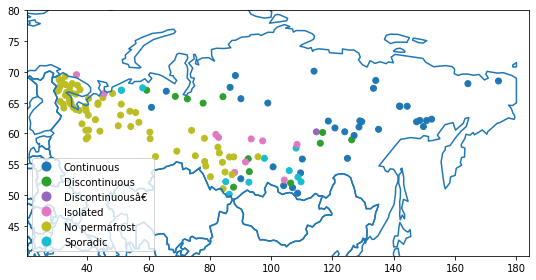

In [17]:
# Check it out!
fig, ax = plt.subplots(figsize=(9,5))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)
stations.plot(column="Primary permafrost type", legend=True, ax=ax)

xlim = ([stations.total_bounds[0]-10,  stations.total_bounds[2]+10])
ylim = ([stations.total_bounds[1]-10,  stations.total_bounds[3]+10])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

Can you reproduce the map in Figure 6? Which columns would you choose color and symbols by?

In [18]:
# Reproduced Figure 6

## Get watershed shapefiles

In [19]:
watersheds = gpd.read_file("gis_files/basins_attributes_merged.shp")

In [20]:
# Shapefile column names are limited to 10 characters, which is dumb)
watersheds.head()

,Station ID,Name,Basin,Catchment,Latitude,Longitude,Station el,Start year,End year,Continuous,Discontinu,Sporadic p,Isolated p,No permafr,Primary pe,Prior prim,da_km2,geometry
0,1001,Kolyma at Orotuk,Anadyr Kolyma,43776.0,62.12,148.47,478.2,1968,1996,100.0,0.0,0.0,0.0,0.0,Continuous,None,42554.279935,"POLYGON ((145.25473 61.66054, 145.25360 61.656..."
1,1095,Kulu at Kulu,Anadyr Kolyma,10289.0,61.90,147.42,617.1,1942,1994,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous,10816.833219,"POLYGON ((145.50833 61.71250, 145.50196 61.713..."
2,1151,Detrin at Detrin,Anadyr Kolyma,3237.0,61.13,149.67,556.5,1956,2001,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous,3947.644573,"POLYGON ((149.07881 60.63924, 149.07501 60.635..."
3,1176,Bokhalcha at 5.4 km from ust'ya,Anadyr Kolyma,13551.0,62.10,150.67,334.0,1934,1998,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous,13489.216398,"POLYGON ((150.05769 60.63547, 150.05481 60.639..."
4,1397,Anuy at Ostrovnoye,Anadyr Kolyma,30050.0,68.10,164.17,3.0,1960,1988,100.0,0.0,0.0,0.0,0.0,Continuous,Continuous,30159.400372,"POLYGON ((166.66193 67.10196, 166.65794 67.096..."


(39.466666667, 80.72916802300348)

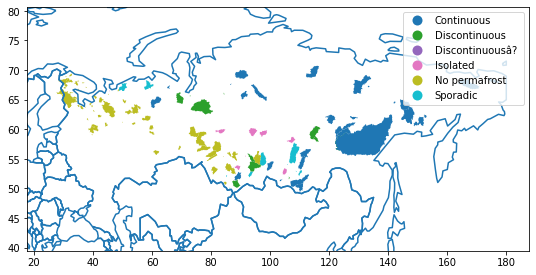

In [21]:
# Check it out!
fig, ax = plt.subplots(figsize=(9,5))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.boundary.plot(ax=ax)
watersheds.plot(column="Primary pe", legend=True, ax=ax)

xlim = ([watersheds.total_bounds[0]-10,  watersheds.total_bounds[2]+10])
ylim = ([watersheds.total_bounds[1]-10,  watersheds.total_bounds[3]+10])

ax.set_xlim(xlim)
ax.set_ylim(ylim)

In [23]:
# Add another fun map!!! Maybe color it by % continuous permafrost so you see a sliding colorbar rather than categorial colors

# Apply - analyze trends within each watershed

This is where I might have us use ee since temporal trends in spectral data are otherwise unwieldy datasets

If you get to this point let me know

In [1]:
# Import packages
import ee
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import os
import requests

# Initialize EE
ee.Initialize()

In [26]:
waterMask = ee.ImageCollection('MODIS/006/MOD44W').filter(ee.Filter.date('2015-01-01', '2015-01-02')).select('water_mask').first();

In [27]:
ndvi = ee.ImageCollection('MODIS/006/MOD13Q1').select('NDVI')

In [31]:
# Mask out water
def maskWater (image):
    return image.updateMask(waterMask.select('water_mask').lt(1));

In [37]:
def scale_factor(image):
# scale factor for the MODIS MOD13Q1 product
    return image.multiply(0.0001).copyProperties(image, ['system:time_start'])

In [38]:
modisMasked = ndvi.map(maskWater);
modisMasked = ndvi.map(scale_factor);

ndvi = modisMasked

In [39]:
ndvi_first = ndvi.first()

In [48]:
countries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017');
roi = countries.filterMetadata('country_na', 'equals', 'Russia');


In [57]:
russia_ndvi = ndvi_first.clip(roi)

In [58]:
russia_ndvi

In [70]:
u_lon =100
u_lat = 60
u_poi = ee.Geometry.Point(u_lon, u_lat)
roi = u_poi.buffer(1e6)

In [72]:
from IPython.display import Image

# Create a URL to the styled image for a region around France.
url = ndvi_first.getThumbUrl({
    'min': -1.0, 'max': 1.0, 'dimensions': 512, 'region': roi,
   })
print(url)

# Display the thumbnail land surface temperature in France.
print('\nPlease wait while the thumbnail loads, it may take a moment...')
Image(url=url)

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/d3e62d9f9b019c1bee4639087bd32b88-c0bda8c6230f8d54dc705d6178a5128a:getPixels

Please wait while the thumbnail loads, it may take a moment...
